In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nf_mctm import *
from training_helpers import *

import torch
from torch.distributions.multivariate_normal import MultivariateNormal

import seaborn as sns
#import statsmodels.api as sm

In [ ]:
loc = torch.zeros(3)
lam = torch.Tensor([[1, 0, 0],
                    [3, 1, 0],
                    [0, 0, 1]])
scale = lam @ torch.eye(3) @ torch.transpose(lam, 0, 1)
y_distribution = MultivariateNormal(loc, scale)
y = y_distribution.sample((2000, 1))  # Generate training data
y = y.reshape((2000, 3))
y.size()

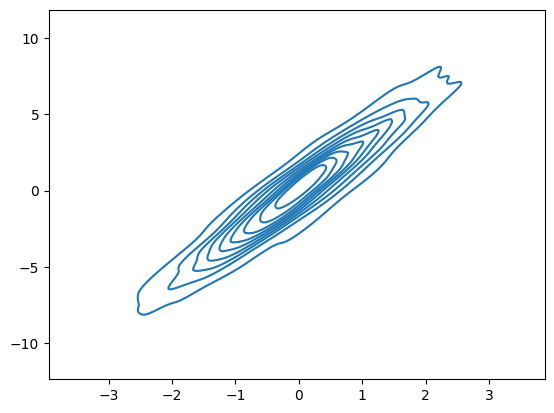

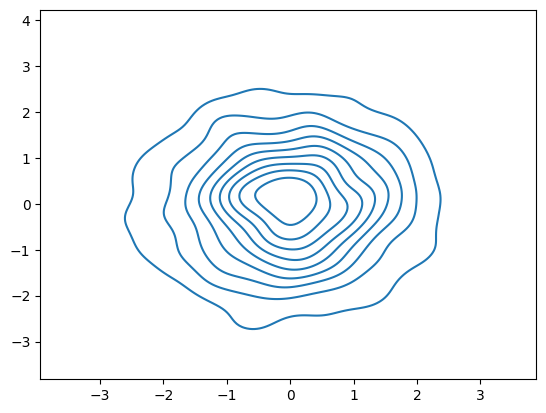

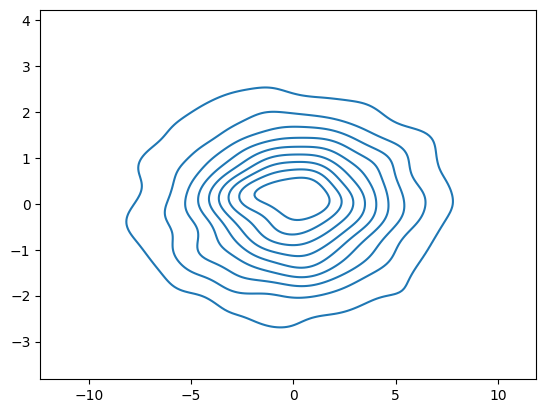

In [3]:
sns.kdeplot(x=y[:,0], y=y[:,1])
plt.show()
sns.kdeplot(x=y[:,0], y=y[:,2])
plt.show()
sns.kdeplot(x=y[:,1], y=y[:,2])
plt.show()

In [4]:
import torch
from torch import nn
from flip import Flip
from bernstein_transformation_layer import Transformation
from decorrelation_layer import Decorrelation



class NF_MCTM(nn.Module):
    def __init__(self, polynomial_range, number_variables):
        super(NF_MCTM, self).__init__()
        self.polynomial_range = polynomial_range
        self.number_variables = number_variables

        self.l1 = Transformation(degree=10, number_variables=self.number_variables, polynomial_range=self.polynomial_range.repeat(1,3))
        self.l2 = Decorrelation(degree=12, number_variables=self.number_variables, polynomial_range=self.polynomial_range.repeat(1,3), spline="bernstein")
        #self.l3 = Flip()
        #self.l4 = Decorrelation(degree=12, number_variables=self.number_variables, polynomial_range=self.polynomial_range.repeat(1,3), spline="bernstein")
        #self.l5 = Flip()
        #self.l6 = Decorrelation(degree=12, number_variables=self.number_variables, polynomial_range=self.polynomial_range.repeat(1,3), spline="bernstein")

    def forward(self, x, return_log_d=False):
        if return_log_d==True:
            output, log_d = self.l1(x, return_log_d = True)
            output, log_d = self.l2(output, return_log_d = True)
            #output = self.l3(output)
            #output, log_d = self.l4(output, log_d, return_log_d = True)
            #output = self.l5(output)
            #output, log_d = self.l6(output, log_d, return_log_d=True)

            return output, log_d
        else:
            output = self.l1(x)
            output = self.l2(output)
            #output = self.l3(output)
            #output = self.l4(output)
            #output = self.l5(output)
            #output = self.l6(output)

            return output

In [ ]:
pr = torch.tensor([[-10], [10]])
np.linspace(pr[0].item(),pr[1].item(),10+1)
#pr[0].detach().numpy().item()

In [5]:
nf_mctm = NF_MCTM(polynomial_range=torch.tensor([[-10], [10]]), number_variables=3)

#nf_mctm.l1.params = nf_mctm.l1.params.double()

In [6]:
nf_mctm.l1.params

Parameter containing:
tensor([[-10.0000, -10.0000, -10.0000],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931]], dtype=torch.float64,
       requires_grad=True)

In [10]:
nf_mctm.l1.params

Parameter containing:
tensor([[0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000]], requires_grad=True)

In [11]:
p = torch.FloatTensor(np.repeat(np.repeat(1/(10+1),10+1),3))
p = torch.reshape(p, (10 + 1, 3))

nf_mctm.l1.params = nn.Parameter(p)

In [12]:
nf_mctm.l1.params

Parameter containing:
tensor([[0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909],
        [0.0909, 0.0909, 0.0909]], requires_grad=True)

In [ ]:
p = torch.FloatTensor(np.repeat(np.repeat(1/(10+1),10+1),3))

In [ ]:
p = torch.reshape(p,(10+1, 3))

In [ ]:
p.size()

In [ ]:
p_res = p[:,0]
p_res[1:] = torch.matmul(torch.exp(p[1:,0]),torch.triu(torch.ones(10,10))) + p[1,0]

In [ ]:
p_res

In [ ]:
data = torch.reshape(torch.range(0, 1,1/100).repeat(3), (101, 3))
data.size()

In [ ]:
from bernstein_transformation_layer import *

In [ ]:
n =10
v = 0
a = p_res[v] * torch.FloatTensor([n]) * (b(torch.FloatTensor([v-1]), torch.FloatTensor([n-1]), data) -
                                         b(torch.FloatTensor([v]), torch.FloatTensor([n-1]), data))

In [ ]:
data = torch.range(0, 1,1/100)

In [ ]:

n = torch.tensor(6)
for v in range(6+1):
    v = torch.tensor(v)
    plt.plot(b(v, n, data))

In [ ]:
data = torch.tensor(np.linspace(0,1,100))
params = torch.tensor(np.linspace(0,1,6+1))
pred = sum(params[v]*b(torch.tensor(v), n, data) for v in range(6+1))
plt.plot(pred,data)

In [ ]:
par_restricted_opt = torch.tensor(np.linspace(0,1,6+1))

In [ ]:
par_restricted_opt

In [ ]:
torch.log(torch.diff(par_restricted_opt))

In [ ]:
par_restricted_opt[0]

In [49]:
def compute_starting_values_berstein_polynomials(degree,min,max):
    par_restricted_opt = torch.tensor(np.linspace(min,max,degree+1))
    par_unristricted = par_restricted_opt
    par_unristricted[1:] = torch.log(torch.diff(par_restricted_opt))

    par_restricted_opt = torch.Tensor.repeat(par_unristricted,(3,1)).T
    #par_restricted_opt = torch.reshape(par_restricted_opt,(degree+1,3))

    return par_restricted_opt

example = compute_starting_values_berstein_polynomials(10,torch.tensor(-10),torch.tensor(10))

example.size()

torch.Size([11, 3])

In [51]:
nn.Parameter(example)

Parameter containing:
tensor([[-10.0000, -10.0000, -10.0000],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931]], dtype=torch.float64,
       requires_grad=True)

In [ ]:
import numpy as np
np.linspace(2.0, 3.0, num=5)

In [ ]:
np.exp(np.log(1))

In [57]:
polynomial_range = torch.tensor([[-10], [10]])

In [63]:
polynomial_range[1,0]

tensor(10)

In [64]:
compute_starting_values_berstein_polynomials(10,
                                             polynomial_range[0,0],
                                             polynomial_range[1,0])

tensor([[-10.0000, -10.0000, -10.0000],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931]], dtype=torch.float64)

In [65]:
nf_mctm = NF_MCTM(polynomial_range=torch.tensor([[-10], [10]]), number_variables=3)

nf_mctm.l1.params = nn.Parameter(compute_starting_values_berstein_polynomials(10,
                                             polynomial_range[0,0],
                                             polynomial_range[1,0]))

In [6]:
nf_mctm.l1.params

Parameter containing:
tensor([[-10.0000, -10.0000, -10.0000],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931],
        [  0.6931,   0.6931,   0.6931]], dtype=torch.float64,
       requires_grad=True)

In [7]:
train(nf_mctm, y, iterations=200, verbose=False, patience=10, min_delta=0.0001)

  0%|                                                   | 0/200 [00:00<?, ?it/s]


RuntimeError: expected scalar type Double but found Float

In [15]:
z = nf_mctm.forward(y, return_log_d=False).detach().numpy()

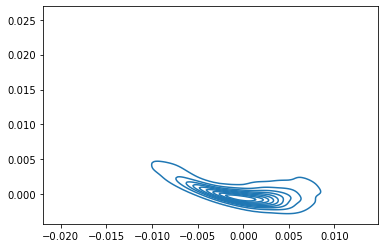

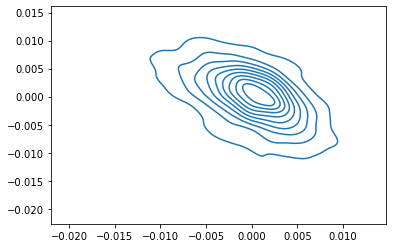

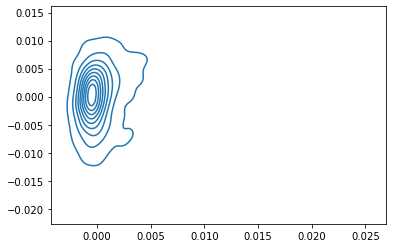

In [16]:
sns.kdeplot(x=z[:,0], y=z[:,1])
plt.show()
sns.kdeplot(x=z[:,0], y=z[:,2])
plt.show()
sns.kdeplot(x=z[:,1], y=z[:,2])
plt.show()

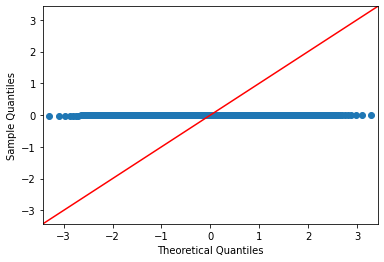

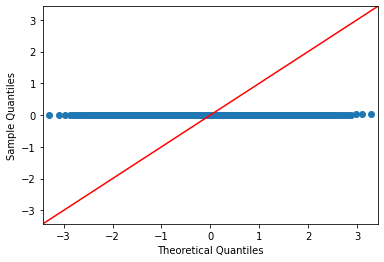

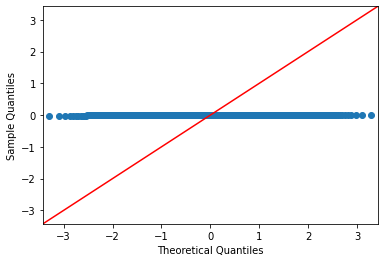

In [17]:
fig = sm.qqplot(z[:,0], line='45')
plt.show()
fig = sm.qqplot(z[:,1], line='45')
plt.show()
fig = sm.qqplot(z[:,2], line='45')
plt.show()